# 1.

어느 한 기사에 따르면 길을 건너는 도중 교통 사고를 당한 사람 중에서 휴대 전화를 본 사람은 20%, 보지 않은 사람은 80%가 된다고 한다. 이는 과연 길을 건널 때 휴대 전화를 보지 않는 것이 더 위험하다는 걸 의미할까? 길을 건너는 도중 휴대전화를 본 사람 중에서 교통 사고를 당할 확률이 휴대전화를 보지 않은 사람보다 더 높으려면, 평소에 길을 건너는 도중 휴대전화를 보는 사람의 비중이 몇 퍼센트(%) 미만이어야 할까? 본인의 생각을 서술하시오.

이는 과연 길을 건널 때 휴대 전화를 보지 않는 것이 더 위험하다는 걸 의미할까? 아니요 -> 휴대전화를 보지 않고 교통사고를 당하지 않은 사람의 비율이 훨싼 많을 수 있다 -> 전체 비율을 알아야 합니다

길을 건너는 도중 휴대전화를 본 사람 중에서 교통 사고를 당할 확률이 휴대전화를 보지 않은 사람보다 더 높으려면, 평소에 길을 건너는 도중 휴대전화를 보는 사람의 비중이 몇 퍼센트(%) 미만이어야 할까? -> 20%미만입니다

# 2.

(1) 나이브 베이즈 종류 3가지와 어떤 데이터일 때 해당 나이브 베이즈를 사용하는지 서술하시오.

가우시안 나이브 베이즈 : 연속적인 어떤 데이터에도 적용할 수 있는 나이브 베이즈

다항분포 나이브 베이즈 : 특성이 어떤 것인지 헤아린 정수 카운트 데이터에 적용할 수 있는 나이브 베이즈

베르누이 나이브 베이즈 : 이진 데이터에 적용할 수 있는 나이브 베이즈

(2) 나이브 베이즈의 장점과 단점을 각각 두가지 이상 서술하시오.

장점 : 계산속도가 빠름, 잡음과 누락 데이터를 잘 처리함

단점 : 일반화 성능이 다른 모델에 비해 떨어질 수 있다, 수치 특징이 많은 데이터 셋에는 이상적이지 않다

# 3.

In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

### 데이터 불러오기

In [ ]:
dataset = datasets.load_wine()

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
print(df.head())

   alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
0    14.23        1.71  2.43  ...                          3.92   1065.0       0
1    13.20        1.78  2.14  ...                          3.40   1050.0       0
2    13.16        2.36  2.67  ...                          3.17   1185.0       0
3    14.37        1.95  2.50  ...                          3.45   1480.0       0
4    13.24        2.59  2.87  ...                          2.93    735.0       0

[5 rows x 14 columns]


### 데이터 파악하기
- shape, info,describe 등등을 사용하여 데이터를 파악하시오.

In [ ]:
df.shape

(178, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
df['target'].value_counts() # 와인의 종류는 0, 1, 2

1    71
0    59
2    48
Name: target, dtype: int64

### 정규분포 확인

In [ ]:
#특징 데이터 목록

# 알콜(Alcohol)

# 말산(Malic acid)

# 회분(Ash)

# 회분의 알칼리도(Alcalinity of ash)

# 마그네슘(Magnesium)

# 총 폴리페놀(Total phenols)

# 플라보노이드 폴리페놀(Flavanoids)

# 비 플라보노이드 폴리페놀(Nonflavanoid phenols)

# 프로안토시아닌(Proanthocyanins)

# 색상의 강도(Color intensity)

# 색상(Hue)

# 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)

# 프롤린(Proline)

### 아래의 그래프를 보고  
정규 분포를 만족하는 예측 변수들을 선택해서 데이터 프레임(new_df)을 만드시오.

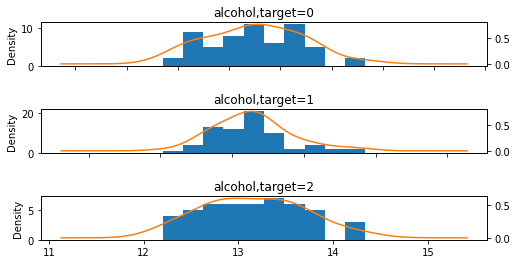

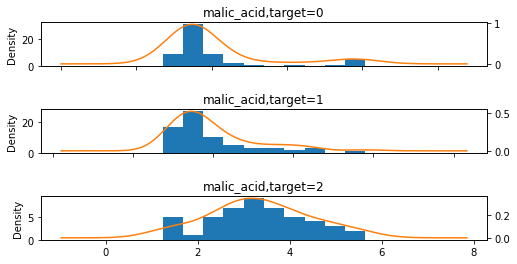

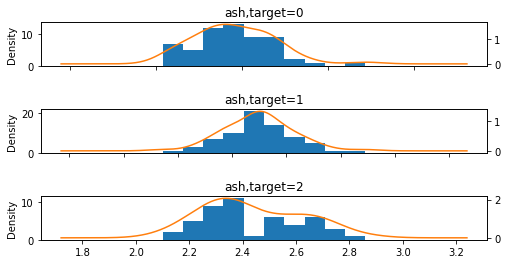

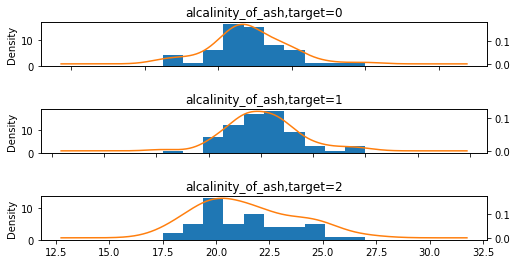

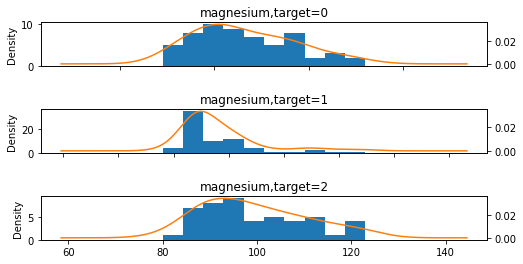

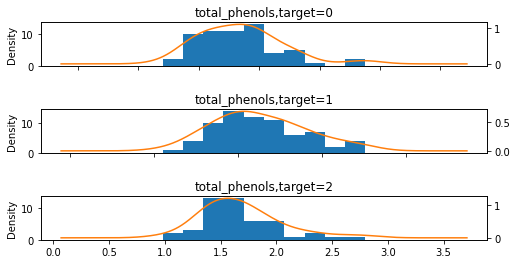

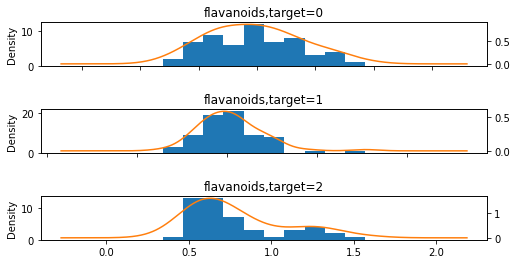

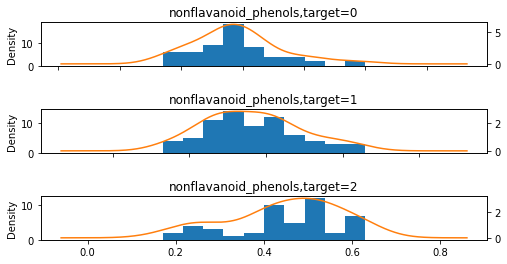

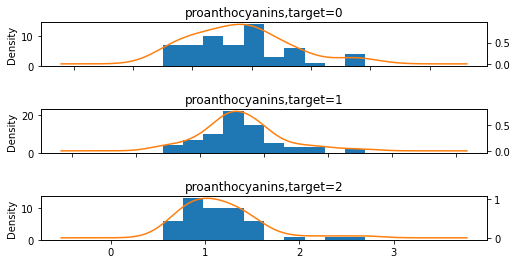

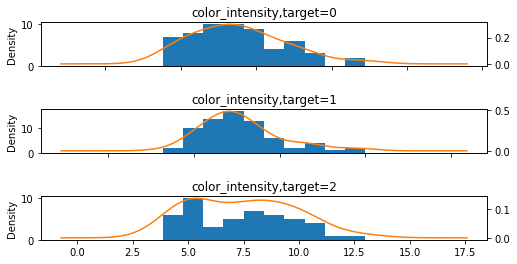

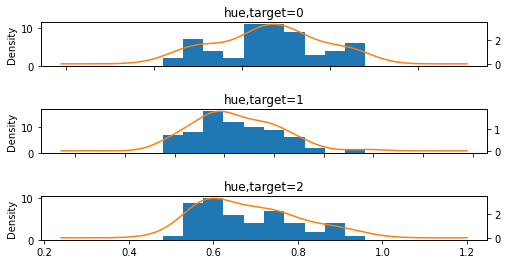

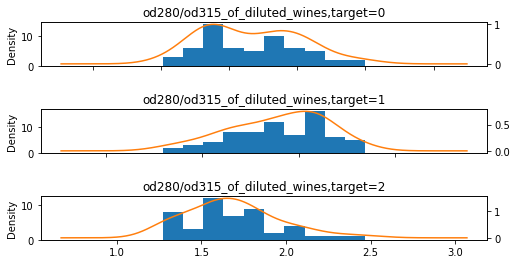

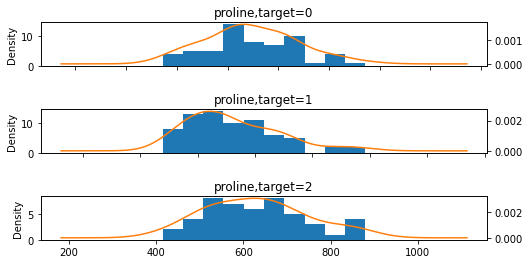

In [ ]:
import matplotlib.pyplot as plt
for i in dataset.feature_names:
    fig, ax = plt.subplots(3)
    plt.subplots_adjust(wspace=0.5, hspace=1)
    
    df[df.target==0][i].plot(kind='hist', ax=ax[0])
    df[df.target==0][i].plot(kind='kde', ax=ax[0],
                                secondary_y=True,
                                title='{0},target=0'.format(i),
                                figsize=(8,4))

    df[df.target==1][i].plot(kind='hist', ax=ax[1])
    df[df.target==1][i].plot(kind='kde', ax=ax[1],
                                secondary_y=True,
                                title='{0},target=1'.format(i),
                                figsize=(8,4))

    df[df.target==2][i].plot(kind='hist', ax=ax[2])
    df[df.target==2][i].plot(kind='kde', ax=ax[2],
                                secondary_y=True,
                                title='{0},target=2'.format(i),
                                figsize=(8,4))
    plt.show()
    print('\n')

In [ ]:
# 컬럼 선택은 사람마다 다를 수 있습니다.
new_df = df[['alcohol','malic_acid','ash','target']]

In [ ]:
new_df.head()

,alcohol,malic_acid,ash,target
0,14.23,1.71,2.43,0
1,13.20,1.78,2.14,0
2,13.16,2.36,2.67,0
3,14.37,1.95,2.50,0
4,13.24,2.59,2.87,0


### 데이터 분리(test_size=0.3, random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_df.drop(['target'], axis=1), new_df['target'],
                                                    test_size=0.3, random_state=10)

### 가우시안 나이브 베이즈 모델로 와인을 분류하고 테스트 데이터의 분류 정확도를 구하시오

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_predict = gnb.predict(x_test) 
score = metrics.accuracy_score(y_test,y_predict)
print(score)

0.7777777777777778


### confusion_matrix 그래프로 결과를 확인하시오

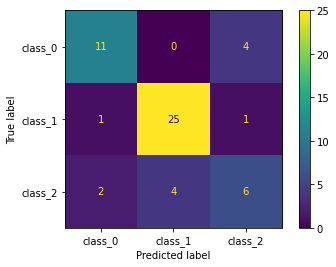

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test,y_predict)
ConfusionMatrixDisplay(cm, display_labels=dataset.target_names).plot()

### 최적의 var_smoothing 값 을 찾으시오 (cv= 5)

In [ ]:
params_gnb = {'var_smoothing': [1, 0.5, 0.1,0.01, 0.001,0.0001,0.00001,0.000001, 0.0000001,0.00000001,0.000000001]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(GaussianNB(), param_grid=params_gnb,
                    cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1, 0.5, 0.1, 0.01, 0.001, 0.0001,
                                           1e-05, 1e-06, 1e-07, 1e-08, 1e-09]})

In [ ]:
print(grid.best_estimator_)
print(grid.best_score_)

GaussianNB(var_smoothing=0.1)
0.8143333333333335


In [ ]:
pred = grid.predict(x_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.89      0.93      0.91        27
           2       0.58      0.58      0.58        12

    accuracy                           0.80        54
   macro avg       0.75      0.75      0.75        54
weighted avg       0.79      0.80      0.79        54



# 4.

### 데이터 불러오기

'spam' 데이터를 data로 불러오고, 해당하는 코드를 실행해 데이터를 살펴봅니다

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/spam.csv", engine='python')

In [ ]:
#head
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#info
data.info

<bound method DataFrame.info of         v1  ... Unnamed: 4
0      ham  ...        NaN
1      ham  ...        NaN
2     spam  ...        NaN
3      ham  ...        NaN
4      ham  ...        NaN
...    ...  ...        ...
5567  spam  ...        NaN
5568   ham  ...        NaN
5569   ham  ...        NaN
5570   ham  ...        NaN
5571   ham  ...        NaN

[5572 rows x 5 columns]>

In [ ]:
#isna
data.isna

<bound method DataFrame.isna of         v1  ... Unnamed: 4
0      ham  ...        NaN
1      ham  ...        NaN
2     spam  ...        NaN
3      ham  ...        NaN
4      ham  ...        NaN
...    ...  ...        ...
5567  spam  ...        NaN
5568   ham  ...        NaN
5569   ham  ...        NaN
5570   ham  ...        NaN
5571   ham  ...        NaN

[5572 rows x 5 columns]>

### 데이터 전처리
데이터 처리 과정에서 가급적 inplace=True를 사용해주세요!(copy 데이터를 만드셔도 됩니다)

#### 1) data에서 'Unnamed:2', 'Unnamed:3', 'Unnamed:4'열을 제거 후, 'ham'은 0으로, 'spam'은 1로 변환하세요.

In [ ]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
data = data.replace('ham', '0')
data = data.replace('spam', '1')

#### 2) 아래 빈 칸을 채워, 수정한 data에서 중복된 데이터가 있는지 확인하고, 만약 있다면 제거해주세요(hint: nunique())

In [ ]:
print('v2열의 유니크한 값 :',data['v2'].nunique())

v2열의 유니크한 값 : 5169


In [ ]:
data = data.drop_duplicates(['v2'])

In [ ]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ? b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


#### 3) 변수 별 barplot을 통해 데이터 분포를 살펴보세요(hint: value_counts, plot(kind='bar'))

In [ ]:
data['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

In [ ]:
data['v2'].value_counts()

Rose needs water, season needs change, poet needs imagination..My phone needs ur sms and i need ur lovely frndship forever....                                                                          1
Our brand new mobile music service is now live. The free music player will arrive shortly. Just install on your phone to browse content from the top artists.                                           1
Like a personal sized or what                                                                                                                                                                           1
Is xy in ur car when u picking me up?                                                                                                                                                                   1
Even i cant close my eyes you are in me our vava playing umma :-D                                                                                                                               

#### 4) 아래 코드를 수정실행해 정상 메일과 스팸 메일의 개수를 확인해보세요

In [ ]:
print('정상 메일과 스팸 메일의 개수')
print(data.groupby('v1').size().reset_index(name='count'))

정상 메일과 스팸 메일의 개수
  v1  count
0  0   4516
1  1    653


#### 5) 스팸여부(v1)와 메일 이름(v2) 컬럼을 각각 y_data, X_data에 저장하고, 아래 코드를 실행하세요

In [ ]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


#### 6) X_data, y_data를 sklearn을 활용하여 train셋: test셋 = 8:2 비율, random_state = 0으로 지정하세요. 
X_train, X_test, y_train, y_test로 분리하세요.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'],
                                                    test_size=0.2, random_state=0)

#### 7) 위에서 분리한 데이터에 대해 아래 코드를 실행해 테스트 데이터가 고르게 분배되었는지 확인합니다.
(빈칸을 채워주세요! hint: value_counts, len)

In [ ]:
y_train.value_counts()

0    3631
1     504
Name: v1, dtype: int64

In [ ]:
y_test.value_counts()

0    885
1    149
Name: v1, dtype: int64

In [ ]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round( 3631   /len(y_train),3)}%')
print(f'스팸 메일 = {round(  504   /len(y_train),3)}%')

print('--------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(   885  /   len(y_test)  ,3)}%')
print(f'스팸 메일 = {round(  149   /  len(y_test)   ,3)}%')

--------훈련 데이터의 비율-----------
정상 메일 = 0.878%
스팸 메일 = 0.122%
--------테스트 데이터의 비율-----------
정상 메일 = 0.856%
스팸 메일 = 0.144%


### 모델 학습 및 테스트하기

#### 8) CountVectorizer로 df를 고정된 크기의 벡터로 변환하세요

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
x_traincv = cv.fit_transform(X_train)
x_traincv

<4135x7551 sparse matrix of type '<class 'numpy.int64'>'
	with 53910 stored elements in Compressed Sparse Row format>

#### 9) 위 데이터를 array 형태로 변환하세요

In [ ]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### 10) 테스트 데이터의 첫 번째 행에 포함된 단어들을 확인해보세요

In [ ]:
cv.inverse_transform(encoded_input)[0]

array(['also', 'beads', 'come', 'don', 'ever', 'off', 'remember', 'the'],
      dtype='<U34')

#### 11) y_train 데이터로 베르누이 나이브베이즈 모델을 학습시키세요

In [ ]:
bnb = BernoulliNB()
y_train = y_train.astype('int')
bnb.fit(x_traincv, y_train)

BernoulliNB()

#### 12) X_test 데이터로 테스트해보세요

In [ ]:
X_testcv = cv.transform(X_test)
X_testcv

<1034x7551 sparse matrix of type '<class 'numpy.int64'>'
	with 12779 stored elements in Compressed Sparse Row format>

In [ ]:
predictions = bnb.predict(X_testcv)

#### 13) 결과값을 출력하세요

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

#### 14) y_test 데이터와 비교하여 정확도를 출력하세요

In [ ]:
from sklearn.metrics import accuracy_score
y_test = y_test.astype('int')
accuracy_score(y_test, predictions)

0.9690522243713733